# Как построить бизнес на печеньках

### Сначала загрузим библиотеки, которые будем использовать

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

### В следующем блоке сохраним экзогенные параметры

In [2]:
price = 50
cost = 30
discounted_price = 15
mean = 2500
std = 500

### Найдём параметры для логнормального распределения

In [3]:
a = np.log((mean)**2 / np.sqrt(std**2 + mean**2))
s = np.sqrt(np.log(1 + (std**2 / mean**2)))

### Найдём массив ежедневных прибылей в n мультивселенных с одного конкретно значения предложения. При этом кол-во упаковок печенья - целое число, значит округлим полученные по логнормальному закону распределения значения вниз. Почему вниз? Если спрос предъявляется на 10.5 упаковок печенья, то купить смогут только 10

In [4]:
def imitation (a, s, order, n):
    demand = np.floor(np.random.lognormal(a, s, n)).astype(int)
    profits = np.zeros(len(demand))
    profits[demand >= order] = order * (price - cost)
    profits[demand < order] = demand[demand < order] * (price - cost) + (order - demand[demand < order]) * (discounted_price - cost)
    return(profits)

### Рассмотрим ситуацию. Когда у нас есть логнормальное распределение спроса на продукцию, этот тип распределения может иметь тяжелый правый хвост, что означает, что существует вероятность крайне высоких значений прибыли. Если мы используем среднее значение для прогнозирования, то это может быть искажено этими экстремальными значениями.

### Преимущества использования правила урезания:

#### 1. Улучшение стабильности: Урезанные средние могут быть менее чувствительны к выбросам и экстремальным значениям, что делает их более устойчивыми.

#### 2. Сохранение общих тенденций: При урезании малых и больших значений мы сохраняем общие закономерности данных, избегая влияния аномалий.

#### 3. Простота и интерпретируемость: Правило урезания просто в применении и позволяет легко контролировать уровень "очистки" данных.

### Например, вот так будет выглядеть распределение приыли для заказа в 3500 упаковок

#### (урезать будем 10%)

In [5]:
u = 0.1

среднее: 34594.962045, медиана: 33285.0, урезанное среднее: 34007.78815


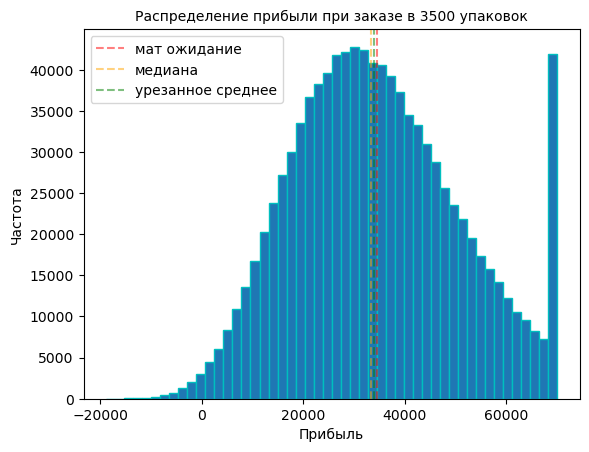

In [6]:
profits = imitation(a, s, 3500, 1000000)
plt.hist(profits, bins=50, edgecolor='c');
plt.axvline(np.mean(profits), color='red', linestyle='--', alpha=0.5, label='мат ожидание')
plt.axvline(np.median(profits), color='orange', linestyle='--', alpha=0.5, label='медиана')
plt.axvline(stats.trim_mean(profits, u), color='green', linestyle='--', alpha=0.5, label='урезанное среднее')
plt.legend(loc='upper left', fontsize=10)
plt.xlabel('Прибыль', fontsize=10)
plt.ylabel('Частота', fontsize=10)
plt.title('Распределение прибыли при заказе в 3500 упаковок', fontsize=10)
print(f'среднее: {np.mean(profits)}, медиана: {np.median(profits)}, урезанное среднее: {stats.trim_mean(profits, u)}')

### Тогда будем использовать в качестве оценки прибыли урезанное среднее

## 1) Какова при этом будет средняя и медианная величина прибыли?

### Построим график зависимости средней ежедневной прибыли (в n мультвселенных) от предложения

### Какое будем брать предложение? Чтобы несколько уменьшить промежуток возможных значений предложения, воспользуемся правилом 3х сигм

(3000,)

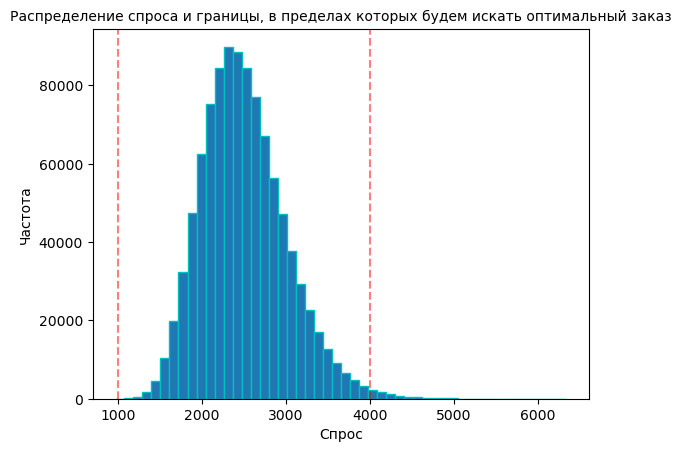

In [7]:
demand = np.floor(np.random.lognormal(a, s, 1000000)).astype(int)
plt.hist(demand, bins=50, edgecolor='c');
plt.axvline(max(0, mean - 3*std), color='red', linestyle='--', alpha=0.5)
plt.axvline(mean + 3*std, color='red', linestyle='--', alpha=0.5)
plt.xlabel('Спрос', fontsize=10)
plt.ylabel('Частота', fontsize=10)
plt.title('Распределение спроса и границы, в пределах которых будем искать оптимальный заказ', fontsize=10)
supply_array = np.array(range(max(0, mean - 3*std), mean + 3*std))
supply_array.shape

### Теперь непосредственно построим график этой зависимости: ожидаемой прибыли (урезанное среднее) от значения предложения

##### (Следующая строка кода выполняется около 30 секунд)

In [8]:
vectorized_trim_mean = np.vectorize(lambda x: stats.trim_mean(imitation(a, s, x, 100000), u))
multiverses_profits = vectorized_trim_mean(supply_array)

Таким образом, среднее значение прибыли для всех значений предложения составляет 35769.029669125004, а медиана - 36586.85571875


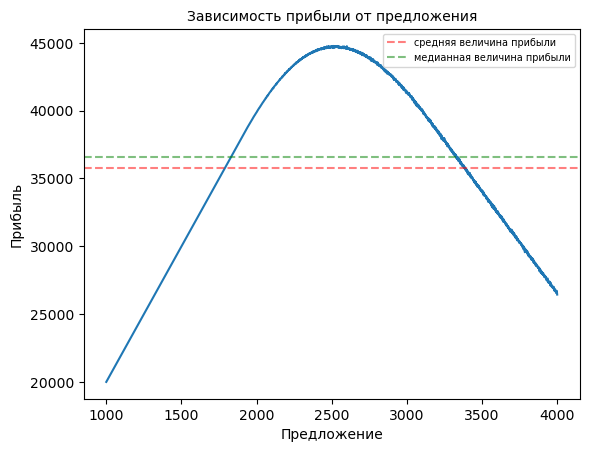

In [9]:
plt.plot(supply_array, multiverses_profits)
plt.axhline(np.mean(multiverses_profits), color='red', linestyle='--', alpha=0.5, label= 'средняя величина прибыли')
plt.axhline(np.median(multiverses_profits), color='green', linestyle='--', alpha=0.5, label= 'медианная величина прибыли')
plt.legend(loc='upper right', fontsize=7)
plt.xlabel('Предложение', fontsize=10)
plt.ylabel('Прибыль', fontsize=10)
plt.title('Зависимость прибыли от предложения', fontsize=10)
print(f'Таким образом, среднее значение прибыли для всех значений предложения составляет {np.mean(multiverses_profits)}, а медиана - {np.median(multiverses_profits)}')

## 2) Cколько печенья Вы посоветуете печь ежедневно (ваш оптимальный заказ)?

### Мы уже нашли зависимость прибыли от предложения (заказа), значит остаётся найти максимум функции, задающей эту зависимость

Я посоветую печь ежедневно 2510 упаковок печенья


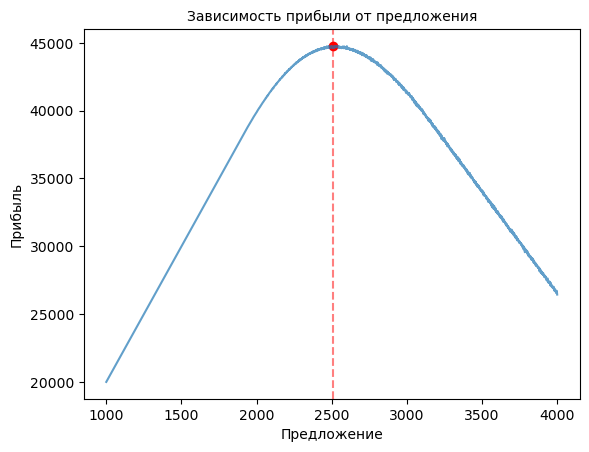

In [10]:
plt.plot(supply_array, multiverses_profits, alpha = 0.7)
plt.scatter(supply_array[np.where(multiverses_profits == max(multiverses_profits))], max(multiverses_profits), color='red')
plt.axvline(supply_array[np.where(multiverses_profits == max(multiverses_profits))], color='red', linestyle='--', alpha=0.5)
plt.xlabel('Предложение', fontsize=10)
plt.ylabel('Прибыль', fontsize=10)
plt.title('Зависимость прибыли от предложения', fontsize=10)
print(f'Я посоветую печь ежедневно {supply_array[np.where(multiverses_profits == max(multiverses_profits))][0]} упаковок печенья')

## 3) Какую сумму в среднем фирма теряет на избытке и на недостатке печенья при оптимальном заказе?

### Фирма теряет на профиците товара из-за невыгодной продажи пачек печенья по сниженной цене, т.е. (предложение - спрос) * (сниженная цена - издержки)

### Фирма теряет на дефиците товара недополученную прибыль, т.е. (спрос - предложение) * (цена - издержки)

### Запишем функцию, которая подсчитывает потери каждого типа по принципу, который описан выше

In [11]:
def losses_imitation (a, s, order, n):
    demand = np.floor(np.random.lognormal(a, s, n)).astype(int)
    losses = np.zeros(len(demand))
    losses[demand > order] = (demand[demand > order] - order) * (price - cost)
    losses[demand < order] = (order - demand[demand < order]) * (discounted_price - cost)
    return(abs(losses[demand > order]), abs(losses[demand < order]))

In [12]:
li = losses_imitation(a,s,supply_array[np.where(multiverses_profits == max(multiverses_profits))][0],100000)

фирма в среднем теряет на дефиците 8519.019308605932, а на профиците 5542.83579224483


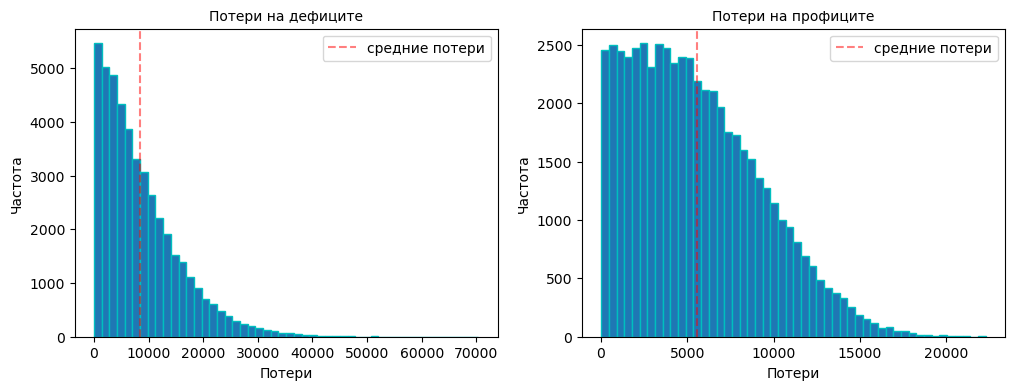

In [13]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
ax1.hist(li[0], bins=50, edgecolor='c')
ax1.set_xlabel('Потери', fontsize=10)
ax1.set_ylabel('Частота', fontsize=10)
ax1.set_title('Потери на дефиците', fontsize=10)
ax1.axvline(np.mean(li[0]), color='red', linestyle='--', alpha=0.5, label= 'средние потери')
ax1.legend(loc='upper right', fontsize=10)
ax2.hist(li[1], bins=50, edgecolor='c')
ax2.set_xlabel('Потери', fontsize=10)
ax2.set_ylabel('Частота', fontsize=10)
ax2.set_title('Потери на профиците', fontsize=10)
ax2.axvline(np.mean(li[1]), color='red', linestyle='--', alpha=0.5, label= 'средние потери')
ax2.legend(loc='upper right', fontsize=10)
print(f'фирма в среднем теряет на дефиците {np.mean(li[0])}, а на профиците {np.mean(li[1])}')

## Как изменятся ответы на вопросы 1, 2 и 3, если стандартное отклонение увеличится до 1000 упаковок? Меняем один из экзогенных параметров и получаем ответы  

In [14]:
std = 1000
a = np.log((mean)**2 / np.sqrt(std**2 + mean**2))
s = np.sqrt(np.log(1 + (std**2 / mean**2)))

(5500,)

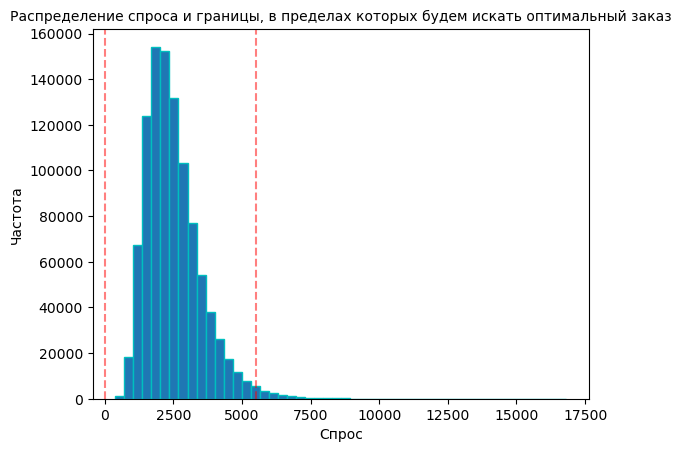

In [15]:
demand = np.floor(np.random.lognormal(a, s, 1000000)).astype(int)
plt.hist(demand, bins=50, edgecolor='c');
plt.axvline(max(0, mean - 3*std), color='red', linestyle='--', alpha=0.5)
plt.axvline(mean + 3*std, color='red', linestyle='--', alpha=0.5)
plt.xlabel('Спрос', fontsize=10)
plt.ylabel('Частота', fontsize=10)
plt.title('Распределение спроса и границы, в пределах которых будем искать оптимальный заказ', fontsize=10)
supply_array = np.array(range(max(0, mean - 3*std), mean + 3*std))
supply_array.shape

#### (Следующая строка кода выполняется около 56 секунд)

Таким образом, среднее значение прибыли для всех значений предложения составляет 23180.402418079546, а медиана - 24344.241687499998


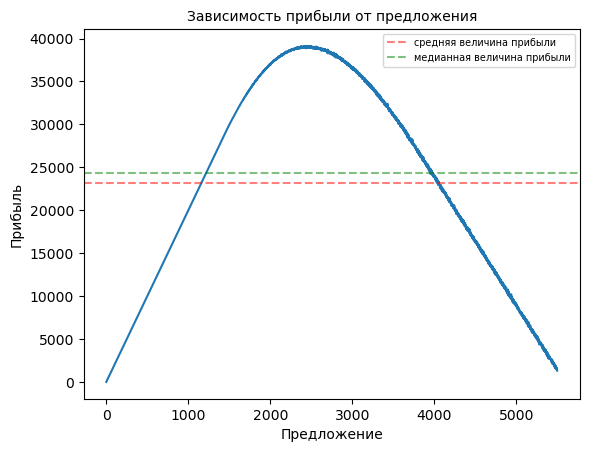

In [16]:
vectorized_trim_mean = np.vectorize(lambda x: stats.trim_mean(imitation(a, s, x, 100000), u))
multiverses_profits = vectorized_trim_mean(supply_array)
plt.plot(supply_array, multiverses_profits)
plt.axhline(np.mean(multiverses_profits), color='red', linestyle='--', alpha=0.5, label= 'средняя величина прибыли')
plt.axhline(np.median(multiverses_profits), color='green', linestyle='--', alpha=0.5, label= 'медианная величина прибыли')
plt.legend(loc='upper right', fontsize=7)
plt.xlabel('Предложение', fontsize=10)
plt.ylabel('Прибыль', fontsize=10)
plt.title('Зависимость прибыли от предложения', fontsize=10)
print(f'Таким образом, среднее значение прибыли для всех значений предложения составляет {np.mean(multiverses_profits)}, а медиана - {np.median(multiverses_profits)}')

Я посоветую печь ежедневно 2453 упаковок печенья


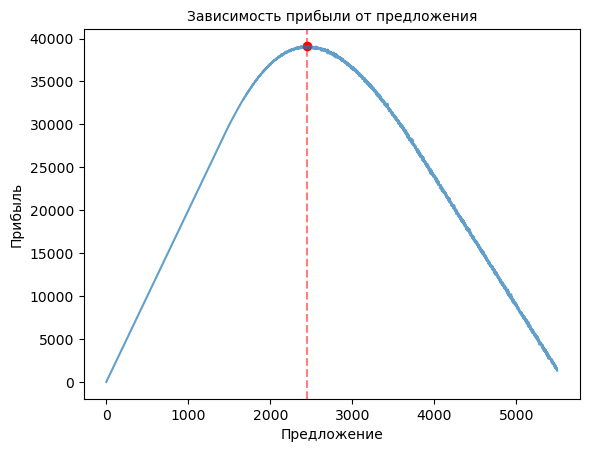

In [17]:
plt.plot(supply_array, multiverses_profits, alpha = 0.7)
plt.scatter(supply_array[np.where(multiverses_profits == max(multiverses_profits))], max(multiverses_profits), color='red')
plt.axvline(supply_array[np.where(multiverses_profits == max(multiverses_profits))], color='red', linestyle='--', alpha=0.5)
plt.xlabel('Предложение', fontsize=10)
plt.ylabel('Прибыль', fontsize=10)
plt.title('Зависимость прибыли от предложения', fontsize=10)
print(f'Я посоветую печь ежедневно {supply_array[np.where(multiverses_profits == max(multiverses_profits))][0]} упаковок печенья')

фирма в среднем теряет на дефиците 18099.676947650223, а на профиците 9573.46683963029


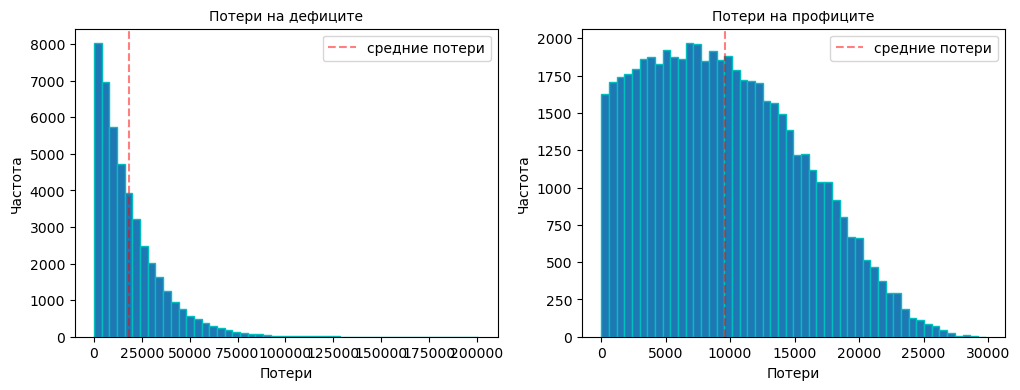

In [18]:
li = losses_imitation(a,s,supply_array[np.where(multiverses_profits == max(multiverses_profits))][0],100000)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
ax1.hist(li[0], bins=50, edgecolor='c')
ax1.set_xlabel('Потери', fontsize=10)
ax1.set_ylabel('Частота', fontsize=10)
ax1.set_title('Потери на дефиците', fontsize=10)
ax1.axvline(np.mean(li[0]), color='red', linestyle='--', alpha=0.5, label= 'средние потери')
ax1.legend(loc='upper right', fontsize=10)
ax2.hist(li[1], bins=50, edgecolor='c')
ax2.set_xlabel('Потери', fontsize=10)
ax2.set_ylabel('Частота', fontsize=10)
ax2.set_title('Потери на профиците', fontsize=10)
ax2.axvline(np.mean(li[1]), color='red', linestyle='--', alpha=0.5, label= 'средние потери')
ax2.legend(loc='upper right', fontsize=10)
print(f'фирма в среднем теряет на дефиците {np.mean(li[0])}, а на профиците {np.mean(li[1])}')